# Atlantic Technological University
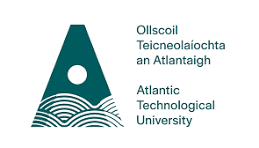

# Higher Diploma in Science in Computing (Data Analytics)-Level 8

# Applied Statistics 24-25

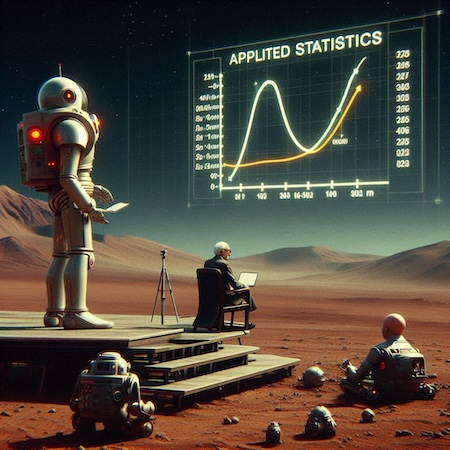

# Final Project

## Due: last commit 20 December 2024

### Author: Jean-Samuel Bonsenge-Bokanga

### Introduction

For the purpose of the Higher Diploma in Science in Computing in Data Analytics, I am required to submit a project as part of the Applied Statistics module assessment. The notebook file is called **project.ipynb** and will carried out computation operations as per the instructions below, using the Python Programming Language.

### Instructions

Complete the project in a single notebook called **project.ipynb** in your repository. The same style should be used as detailed above: explanations in MarkDown and code comments, clean code, and regular commits. Use plots as appropriate.

In this project, you will analyze the **PlantGrowth R** dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables, a treatment group and the weight of plants within those groups.

Your task is to perform **t-tests and ANOVA** on this dataset while describing the dataset and explaining your work. In doing this you should:

**Download and save the dataset** to your repository.

**Describe the data set** in your notebook.

**Describe what a t-test is, how it works, and what the assumptions are.**

**Perform a t-test** to determine whether there is a significant difference between the two treatment groups **trt1 and trt2.

**Perform ANOVA** to determine whether there is a significant difference between the three treatment groups **ctrl, trt1, and trt2.

**Explain why it is more appropriate to apply ANOVA** rather than several t-tests when analyzing more than two groups.



# Dataset

## PlantGrowth R Dataset.

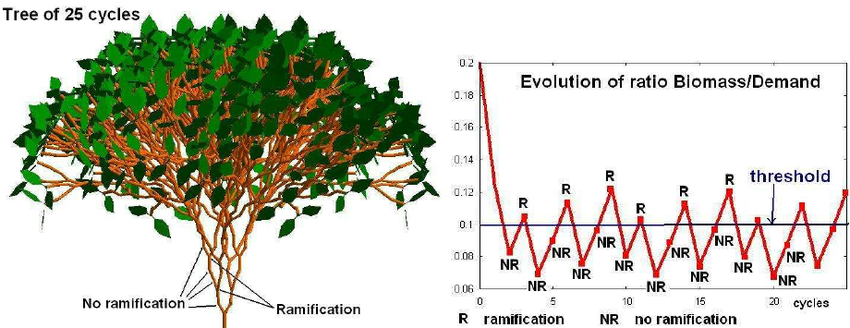

### PlantGrowth R Dataset Summary

##### Reference: https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html

The PlantGrowth dataset in R is a built-in dataset often used in statistical analysis and teaching. It contains data about the effet of different treatments on plant growth. It provides results from an Experiment on Plant Growth. These results are useful to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions.
The Dataset is a data frame of 30 cases on two variables: weights (integer or numerical) and group (fator or string) indicating the treatment group to which the plant belongs. It has three levels: ctrl(control group), trt1 (treatment 1) and trt2 (treatment 2). 

The PlantGrowth dataset is commonly used to demontraste : 

1. descriptive statistics by summarising the weights by group; 
2. ANOVA: to test if there is a significante difference in plant growth between the groups, and 
3. Visualization using Boxplots and other plots to compare group distributions. 

Please refer to:

Dobson, A. J. (1983) An Introduction to Statistical Modelling. London: Chapman and Hall. 

PlantGrowth dataset, R Base Package, R Core Team (2024). Available at: https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/PlantGrowth (Accessed on 05/12/2024)


#### PlantGrowth	R Documentation

Results from an Experiment on Plant Growth

#### Description

Results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions.

#### Usage

PlantGrowth

#### Format
A data frame of 30 cases on 2 variables.

[, 1]	weight	numeric
[, 2]	group	factor

The levels of group are ‘ctrl’, ‘trt1’, and ‘trt2’.

#### Source

Dobson, A. J. (1983) An Introduction to Statistical Modelling. London: Chapman and Hall.



## Relevant Python Libraries

In [1]:
# Efficient numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Alternative statistics package.
import statsmodels.stats.weightstats as stat

# Mains statistics package.
import scipy.stats as ss

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

## Dataset Downloading using df.pd.read_csv() function.

In [2]:
# Downlaod the PlantGrowth.CSV file using pd.read_csv () function.
df = pd.read_csv('PlantGrowth.csv')

In [3]:
# Access the PlantGrowth dataset calling df variable.
df

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


 ### Dataset Statistical Summary [descriptive statistics]

In [4]:
# Statistical Summary.
df.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


### Display the top 5 dataset elements using the df.head() function.

In [5]:
# Display the top 5 dataset elements using the df.head() function.
df.head()

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


### Display the last 5 dataset elements using the df.tail() function. 

In [6]:
# display the last 5 dataset elements using the df.tail() function.
df.tail()

,rownames,weight,group
25,26,5.29,trt2
26,27,4.92,trt2
27,28,6.15,trt2
28,29,5.80,trt2
29,30,5.26,trt2


## Different ways for the group column dataset representation: df.loc(), .grouped.get_group() and looping over populated below:

### Accessing fators 'ctrl' using ctrl_group variable, df.loc() and .grouped.get_group() functions

#### df.loc()

In [15]:
# Access fator 'ctrl' using ctrl_group variable.
ctrl_group = df.loc[df['group'] == 'ctrl']
# Execute the script.
print(ctrl_group)

   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl
5         6    4.61  ctrl
6         7    5.17  ctrl
7         8    4.53  ctrl
8         9    5.33  ctrl
9        10    5.14  ctrl


### .groupby()

In [14]:
# group data by group using .groupby()
grouped = df.groupby('group') 
# access the sub-group 'ctrl'
ctrl_group = grouped.get_group('ctrl')
#excecute the code.
print(ctrl_group)

   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl
5         6    4.61  ctrl
6         7    5.17  ctrl
7         8    4.53  ctrl
8         9    5.33  ctrl
9        10    5.14  ctrl


### Access fator 'trt1' using trt1_group variable via df.loc()

In [15]:
# Access fator 'trt1' using trt1_group variable.
trt1_group = df.loc[df['group'] == 'trt1']
# Execute the script.
print(trt1_group)

    rownames  weight group
10        11    4.81  trt1
11        12    4.17  trt1
12        13    4.41  trt1
13        14    3.59  trt1
14        15    5.87  trt1
15        16    3.83  trt1
16        17    6.03  trt1
17        18    4.89  trt1
18        19    4.32  trt1
19        20    4.69  trt1


### Access fator 'trt2' using trt2_group variable via df.loc()

In [16]:
# Access fator 'trt2' using trt2_group variable.
trt2_group = df.loc[df['group'] == 'trt2']
# Execute the script.
print(trt2_group)

    rownames  weight group
20        21    6.31  trt2
21        22    5.12  trt2
22        23    5.54  trt2
23        24    5.50  trt2
24        25    5.37  trt2
25        26    5.29  trt2
26        27    4.92  trt2
27        28    6.15  trt2
28        29    5.80  trt2
29        30    5.26  trt2


### Show the Dataset 'group' column ONLY and its fators:ctrl, trt1 and trt2 within a loop

In [17]:
# Display only the 'group' column and corresponding indexes.
print(df['group'])

0     ctrl
1     ctrl
2     ctrl
3     ctrl
4     ctrl
5     ctrl
6     ctrl
7     ctrl
8     ctrl
9     ctrl
10    trt1
11    trt1
12    trt1
13    trt1
14    trt1
15    trt1
16    trt1
17    trt1
18    trt1
19    trt1
20    trt2
21    trt2
22    trt2
23    trt2
24    trt2
25    trt2
26    trt2
27    trt2
28    trt2
29    trt2
Name: group, dtype: object


### Show a particular fator: ctrl, trt1 and trt2.

In [18]:
# Show a particular fator: ctrl, trt1 and trt2.
fators = df['group'].unique()
# execute.
print(f"Fators: {fators}")


Fators: ['ctrl' 'trt1' 'trt2']


In [20]:
# Use a for loop to loop over fators and display each fator one by one with 
# their corresponding index, rawname and weight
for fator in fators: 
    # access sub-group data
    fator_data = df.loc[df['group'] == fator]
    # execute.
    print(f"nData for fator'{fator}': ")
    # Call subgroup_data variable and execute.
    print(fator_data)

nData for fator'ctrl': 
   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl
5         6    4.61  ctrl
6         7    5.17  ctrl
7         8    4.53  ctrl
8         9    5.33  ctrl
9        10    5.14  ctrl
nData for fator'trt1': 
    rownames  weight group
10        11    4.81  trt1
11        12    4.17  trt1
12        13    4.41  trt1
13        14    3.59  trt1
14        15    5.87  trt1
15        16    3.83  trt1
16        17    6.03  trt1
17        18    4.89  trt1
18        19    4.32  trt1
19        20    4.69  trt1
nData for fator'trt2': 
    rownames  weight group
20        21    6.31  trt2
21        22    5.12  trt2
22        23    5.54  trt2
23        24    5.50  trt2
24        25    5.37  trt2
25        26    5.29  trt2
26        27    4.92  trt2
27        28    6.15  trt2
28        29    5.80  trt2
29        30    5.26  trt2


### Put all blocs of code into a single entity of code to reach the same above output

In [21]:
# Display only the 'group' column and corresponding indexes.
print(df['group'])

# Show a particular fator: ctrl, trt1 and trt2.
fators = df['group'].unique()
# execute.
print(f"Fators: {fators}")

# Use a for loop to loop over fators and display each fator one by one with 
# their corresponding indexes, rawnames and weights.
for fator in fators: 
    # access fator data
    fator_data = df.loc[df['group'] == fator]
    # execute.
    print(f"nData for fator'{fator}': ")
    # Call fator_data variable and execute.
    print(fator_data)
               


0     ctrl
1     ctrl
2     ctrl
3     ctrl
4     ctrl
5     ctrl
6     ctrl
7     ctrl
8     ctrl
9     ctrl
10    trt1
11    trt1
12    trt1
13    trt1
14    trt1
15    trt1
16    trt1
17    trt1
18    trt1
19    trt1
20    trt2
21    trt2
22    trt2
23    trt2
24    trt2
25    trt2
26    trt2
27    trt2
28    trt2
29    trt2
Name: group, dtype: object
Fators: ['ctrl' 'trt1' 'trt2']
nData for fator'ctrl': 
   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl
5         6    4.61  ctrl
6         7    5.17  ctrl
7         8    4.53  ctrl
8         9    5.33  ctrl
9        10    5.14  ctrl
nData for fator'trt1': 
    rownames  weight group
10        11    4.81  trt1
11        12    4.17  trt1
12        13    4.41  trt1
13        14    3.59  trt1
14        15    5.87  trt1
15        16    3.83  trt1
16        17    6.03  trt1
17        18    4.89  trt1
18        19    4.32  trt1
19      

### Select all fators from the Dataset using df.loc().

In [23]:
# Select all fators(ctrl, trt1 and trt2) from the Dataset group column using df.loc().
df.loc[0:30, ['group']]

,group
0,ctrl
1,ctrl
2,ctrl
3,ctrl
4,ctrl
5,ctrl
6,ctrl
7,ctrl
8,ctrl
9,ctrl


### Select ctrl group ONLY using the df.iloc()

In [79]:
# Select ctrl fator ONLY using the df.iloc()
df.iloc[0:10]

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [24]:
# Select trt1 fator ONLY using the df.iloc()
df.iloc[10:20]

,rownames,weight,group
10,11,4.81,trt1
11,12,4.17,trt1
12,13,4.41,trt1
13,14,3.59,trt1
14,15,5.87,trt1
15,16,3.83,trt1
16,17,6.03,trt1
17,18,4.89,trt1
18,19,4.32,trt1
19,20,4.69,trt1


In [81]:
# Select trt2 fator ONLY using the df.iloc()
df.iloc[20:30]

,rownames,weight,group
20,21,6.31,trt2
21,22,5.12,trt2
22,23,5.54,trt2
23,24,5.50,trt2
24,25,5.37,trt2
25,26,5.29,trt2
26,27,4.92,trt2
27,28,6.15,trt2
28,29,5.80,trt2
29,30,5.26,trt2


# PART 1

# $t$-Tests

<img src="https://imgs.xkcd.com/comics/correlation_2x.png" alt="xkcd" width="500"/>

**Describe what a t-test is, how it works, and what the assumptions are.**

**Perform a t-test** to determine whether there is a significant difference between the two treatment groups **trt1 and trt2.

**Perform ANOVA** to determine whether there is a significant difference between the three treatment groups **ctrl, trt1, and trt2.

**Explain why it is more appropriate to apply ANOVA** rather than several t-tests when analyzing more than two groups.


## Relevant Python Modules

In [7]:
# Efficient numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Alternative statistics package.
import statsmodels.stats.weightstats as stats

# Main statistics package.
import scipy.stats as ss

# Main statistics package.
from scipy import stats  

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")


# t-Tests Description

## What is a t-Test?

### Definition: 

**t-Tests** are used to compare the means of two sets of data to each other, or the mean of one set of data against a particular value (such as zero) (Neural Data Science.io).

### t-Test Types:

- Simple t-Test (One-Sample t-Test)
- Two-sample t-Test
- Paired and Unpaired t-Tests
- Welch's Test

### 1. Simple t-Test

A simple t-Test or 1-sample t-Test is used to compare the mean of one set of data against a specific value. This is often used to compare a data set to zero (Neural data Science.i.o). The one-sample t-test is a statistical hypothesis test that helps determine if an unknown population mean (mu) does not equal a claimed value (Data Camp.com). A one-sample t-test can be run on sample data from a normally distributed variable to test if a population mean μ is equal to a specific claimed value (Texas. The University of Texas at Austin).

<span style="font-size:30px;">$$t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$</span>

Where, t = t-statistic, x = sample mean. 𝝁 = population mean. s = sample standard deviation. n = number of examples in the sample.


### A Two-sample t-Test

<span style="font-size:30px;">$\
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
\$</span>

Where, t= represents the t-statistic, x1= first sample mean;  x2 = second sample mean; s1 = first sample standard deviation; s2 = second sample standard deviation; n1 = first sample size, and n2 = second sample size (datacamp.com, 2024). In another word, t is the t value, x1 and x2 are the means of the two groups being compared, s2 is the pooled standard error of the two groups, and n1 and n2 are the number of observations in each of the groups. 

A Two-sample t-Test is a test for the null hypothesis that 2 independent samples have identical average (expected) values. It assumes that the populations have identical variances by default, and calculates the T-test for the means of two independent samples of scores. (docs.scipy.org, 2024). A larger t value shows that the difference between group means is greater than the pooled standard error, indicating a more significant difference between the groups (scribbr.com).


### Unpaired t-Test (Independent t-Test)

<span style="font-size:30px;">$$t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$</span>


Where x1, x2 = means of the two groups; s2/1, s2/2: variances of the two groups, and n1, n2: sample sizes of the two groups.

An unpaired t-Test is used to compare two independent sets of data (e.g., from two different samples of a population, two groups, etc.).

### A paired t-Test

<span style="font-size:30px;">$$t = \frac{\bar{d}}{\frac{s_d}{\sqrt{n}}}$$</span>

Where, d: Mean of the differences; std: Standard deviation of the differences, and sqrt : Number of paired observations.

A paired t-Test is used to compare the means of two related groups (e.g., before-and-after measurements).A paired t-test must be used when the two sets of data come from the same samples (e.g., the same individual participants).

Paired t tests and 1-sample t tests can both be used to determine whether differences between two samples are significantly different from zero (no difference). 


### Welch's test

<span style="font-size:30px;">$\
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
\$</span>


Welch’s t-test, is the non-parametric equivalent of the two-sample t-test.


### Reference:

[An Introduction to t Tests | Definitions, Formula and Examples
Published on January 31, 2020 by Rebecca Bevans. Revised on June 22, 2023.]. Available at: https://www.scribbr.com/statistics/t-test/#:~:text=A%20t%2Dtest%20is%20a,means%20is%20different%20from%20zero. (Accessed on 07/12/2024)

scipy.stats.
ttest_ind
ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0, *, keepdims=False)[source : https://github.com/scipy/scipy/blob/v1.14.1/scipy/stats/_stats_py.py#L6706-L7030]

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html





Docs.scipy.org(2024) scipy.stats.
ttest_ind. Avaialable at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html(Accessed on 07/12/2024)


Data camp.com (2024) An Introduction to Python T-Tests. Available at:
https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests?dc_referrer=https%3A%2F%2Fwww.rdocumentation.org%2F&utm_source=r-docs&utm_medium=docs&utm_term=PlantGrowth&utm_content=run_example_in_datalab (Accessed on 07/12/2024)

Neural Data Science(2024) Basic Statistics in Python: t tests with SciPy. Available at: 
https://neuraldatascience.io/5-eda/ttests.html (Accessed on 07/12/2024)


Texas. The University of Texas at Austin(2024) One-Sample Test. Available at:
https://sites.utexas.edu/sos/guided/inferential/numeric/claim/one-sample-t/#:~:text=The%20test%20statistic%2C%20t%2C%20is,by%20the%20estimated%20standard%20error%20.(Accessed on 07/12/2024)





## How it works?

Suppose we observe two independent samples, e.g. flower petal lengths, and we are considering whether the two samples were drawn from the same population (e.g. the same species of flower or two species with similar petal characteristics) or two different populations.

The t-test quantifies the difference between the arithmetic means of the two samples. The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from populations with the same population means, is true. A p-value larger than a chosen threshold (e.g. 5% or 1%) indicates that our observation is not so unlikely to have occurred by chance. Therefore, we do not reject the null hypothesis of equal population means. If the p-value is smaller than our threshold, then we have evidence against the null hypothesis of equal population means. docs.scipy.org(2024) SciPy API Statistical functions (scipy.stats)
ttest_ind. Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html(Accessed on 07/12/2024)

## t-Tests General application

## A 1-sample t-Test

A company claims to produce ball bearings of 10 cm diameter (null hypothesis), and you decide to audit if that is true. You collect 21 ball bearings from multiple shops around the city and measure their diameter. You must determine if the company’s claim is false (alternate hypothesis) based on the measurements.

The test is designed as follows:

Null Hypothesis:             H0 : x  = 𝝁

Alternate Hypothesis:  Ha : x  ≠ 𝝁 

T-test flow diagram

To declare the claims as false, you need to statistically prove that the measurements from the sample of bearings are different from the 10 cm claimed by the company. As the sample size is 21 (which is less than 30), we use a t-test. Here the sample mean is 11 cm, and the standard deviation is 1 cm.

#### a one-sample t-test in Python using the scipy.stats.ttest_1samp() function
https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests?dc_referrer=https%3A%2F%2Fwww.rdocumentation.org%2F&utm_source=r-docs&utm_medium=docs&utm_term=PlantGrowth&utm_content=run_example_in_datalab

In [8]:
# Population Mean 
mu = 10

# Sample Size
N1 = 21

# Degrees of freedom  
dof = N1 - 1

# Generate a random sample with mean = 11 and standard deviation = 1
x = np.random.randn(N1) + 11

# Using the Stats library, compute t-statistic and p-value
t_stat, p_val = stats.ttest_1samp(a=x, popmean = mu)
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val)) 

t-statistic = 4.666352081152527
p-value = 0.00014858112542455603


## A two-sample t-Test
Let’s consider that the first factory shares 21 samples of ball bearings where the mean diameter of the sample comes out to be 10.5 cm. On the other hand, the second factory shares 25 samples with a mean diameter of 9.5 cm. Both have a standard deviation of 1 cm. 
https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests?dc_referrer=https%3A%2F%2Fwww.rdocumentation.org%2F&utm_source=r-docs&utm_medium=docs&utm_term=PlantGrowth&utm_content=run_example_in_datalab

In [9]:
# Sample Sizes
N1, N2 = 21, 25

# Degrees of freedom  
dof = min(N1,N2) - 1

# Gaussian distributed data with mean = 10.5 and var = 1  
x = np.random.randn(N1) + 10.5

# Gaussian distributed data with mean = 9.5 and var = 1  
y = np.random.randn(N2) + 9.5

## Using the internal function from SciPy Package  
t_stat, p_val = stats.ttest_ind(x, y)  
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))

t-statistic = 3.412621867385491
p-value = 0.0013910260779184094


## Impaired or independent t-Test

In [10]:
# Import Stastical Package
from scipy.stats import ttest_ind

# Sample data for two groups
group1 = [2.1, 2.5, 2.8, 3.0, 3.3]
group2 = [2.3, 2.6, 3.1, 3.2, 3.8]

# Perform independent t-test
t_stat, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")


T-statistic: -0.785, P-value: 0.455


## Paired t-Test

In [11]:
# Import Stactical Package.
from scipy.stats import ttest_rel

# Sample data for paired groups
before = [2.1, 2.5, 2.8, 3.0, 3.3]
after = [2.2, 2.6, 2.9, 3.1, 3.5]

# Perform paired t-test.
t_stat, p_value = ttest_rel(before, after)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")


T-statistic: -6.000, P-value: 0.004


## Welch’s t-test in Python

Suppose we want to compare the exam scores of 12 students
who used an exam prep booklet to prepare for some exam vs. 12 students who did not.
The following code shows how to perform Welch’s t-test in Python to determine if 
the mean exam scores are equal between the two groups:
https://statisticalpoint.com/welch-t-test-python/


In [14]:
#import ttest_ind() function
from scipy import stats

#define two arrays of data
booklet = [90, 85, 88, 89, 94, 91, 79, 83, 87, 88, 91, 90]
no_booklet = [67, 90, 71, 95, 88, 83, 72, 66, 75, 86, 93, 84]

#perform Welch's t-test 
stats.ttest_ind(booklet, no_booklet, equal_var = False)



Ttest_indResult(statistic=2.236067977499793, pvalue=0.041709795032077744)

## T-test Assumptions
https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests?dc_referrer=https%3A%2F%2Fwww.rdocumentation.org%2F&utm_source=r-docs&utm_medium=docs&utm_term=PlantGrowth&utm_content=run_example_in_datalab

T-Tests are of 4 types.These include:property of independece, indentically distributed, normally distributed and equal variances.


1. Property of Independence

Observations are not influenced by any implicit factor in the data and are not correlated over time. To ensure independence, various techniques can be applied to deal with dependent data. the measurements for each sample subject are in no way influenced by or related to the measurements of other subjects (datacamp.com, University of Texas at Austin).https://sites.utexas.edu/sos/indobs/

2. Identically Distributed

Outliers, or anomalous data records, can impact the lower t-statistic value and lead to increased variance in the data, affecting the probability of rejecting the null hypothesis.

3. Normally Distributed

The t-test is only valid for normally distributed data. Skewed data may lead to incorrect rejection of the null hypothesis.

4. Equal Variances

The two populations being compared should have equal variances for the t-test to hold. This can be tested graphically using a Q-Q plot ( Please an example of a Q-Q plot (Quantile-Quantile plot) below:

### References:

University of Texas (2024)Independent Observations Assumption. Available at: https://sites.utexas.edu/sos/indobs/(Accessed on 07/12/2024)

Data Camp.org (2024) An Introduction to Python T-Tests. Available at: https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests?dc_referrer=https%3A%2F%2Fwww.rdocumentation.org%2F&utm_source=r-docs&utm_medium=docs&utm_term=PlantGrowth&utm_content=run_example_in_datalab (Accessed on 07/12/2024)

### Equal Variances Assumption Application
https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests?dc_referrer=https%3A%2F%2Fwww.rdocumentation.org%2F&utm_source=r-docs&utm_medium=docs&utm_term=PlantGrowth&utm_content=run_example_in_datalab

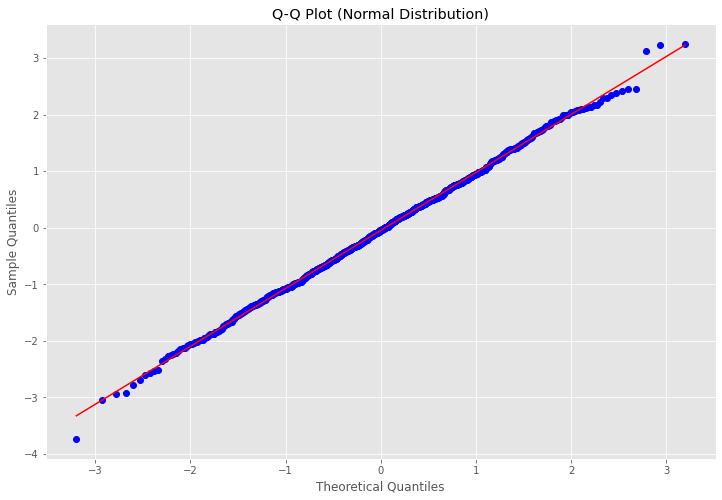

In [15]:
# Generate some data (e.g., normally distributed)
data = np.random.normal(loc=0, scale=1, size=1000)

# Create the Q-Q plot
stats.probplot(data, dist="norm", plot=plt)

# Customize the plot
plt.title("Q-Q Plot (Normal Distribution)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)

# Show the plot
plt.show()

## t-Tests PlantGrowth Dataset Application
SciPy API Statistical functions (scipy.stats) ttest_ind (2024). 
Available at:    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

### Example Data

In [19]:
# Example Data
trt1 = [5.1, 5.5, 5.8, 6.0, 5.4]
trt2 = [6.2, 6.5, 6.1, 6.3, 6.4]

### 1. One-Sample t-test

In [21]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
# 1. One-Sample t-test
print("One-sample t-test")
t_stat, p_value = ttest_1samp(trt1, popmean=5.0)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

One-sample t-test
T-statistic: 3.570429593154692, p-value: 0.023366759912547764


### 2. Independent Two-Sample t-test (Assuming equal variances)

In [22]:
# 2. Independent Two-Sample t-test (Assuming equal variances)
print("\nIndependent two-sample t-test")
t_stat, p_value = ttest_ind(trt1, trt2, equal_var=True)
print(f"T-statistic: {t_stat}, p-value: {p_value}")



Independent two-sample t-test
T-statistic: -4.301162633521313, p-value: 0.0026116483860403484


### 3. Paired t-test

In [23]:
# 3. Paired t-test
print("\nPaired t-test")
trt1_post = [5.3, 5.7, 6.0, 6.2, 5.6] # Hypothetical "after" measurements
t_stat, p_value = ttest_rel(trt1, trt1_post)
print(f"T-statistic: {t_stat}, p-value: {p_value}")


Paired t-test
T-statistic: -1125350553354519.9, p-value: 3.741105323583275e-60


### All blocks  of above code in a single Python code

In [24]:
# Python Code

import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel

# Example Data

trt1 = [5.1, 5.5, 5.8, 6.0, 5.4]
trt2 = [6.2, 6.5, 6.1, 6.3, 6.4]

# 1. One-Sample t-test
print("One-sample t-test")
t_stat, p_value = ttest_1samp(trt1, popmean=5.0)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

# 2. Independent Two-Sample t-test (Assuming equal variances)
print("\nIndependent two-sample t-test")
t_stat, p_value = ttest_ind(trt1, trt2, equal_var=True)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

# 3. Paired t-test
print("\nPaired t-test")
trt1_post = [5.3, 5.7, 6.0, 6.2, 5.6] # Hypothetical "after" measurements
t_stat, p_value = ttest_rel(trt1, trt1_post)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

One-sample t-test
T-statistic: 3.570429593154692, p-value: 0.023366759912547764

Independent two-sample t-test
T-statistic: -4.301162633521313, p-value: 0.0026116483860403484

Paired t-test
T-statistic: -1125350553354519.9, p-value: 3.741105323583275e-60


### Perform a t-test to determine whether there is a significant difference between all faters ctrl, treatment groups trt1 and trt2.

In [26]:
#Below is Python code that uses the PlantGrowth dataset to perform t-tests
#(independent two-sample t-tests) between the ctrl, trt1, and trt2 groups:

# Dataframe
import pandas as pd

# Statistical Package.
from scipy.stats import ttest_ind

# Sample PlantGrowth-like dataset
data = {
    "weight": [4.17, 5.58, 5.18, 6.11, 4.5, 4.61, 5.17, 4.53, 5.33, 5.14, 4.81, 4.17, 
               4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69, 6.31, 5.12, 5.54, 5.5, 
               5.37, 5.29, 4.92, 6.15, 5.8, 5.26],
    "group": ["ctrl"] * 10 + ["trt1"] * 10 + ["trt2"] * 10
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Split data into groups
ctrl = df[df['group'] == 'ctrl']['weight']
trt1 = df[df['group'] == 'trt1']['weight']
trt2 = df[df['group'] == 'trt2']['weight']

# Perform t-tests
print("Independent t-test: ctrl vs trt1")
t_stat, p_value = ttest_ind(ctrl, trt1, equal_var=True)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

print("\nIndependent t-test: ctrl vs trt2")
t_stat, p_value = ttest_ind(ctrl, trt2, equal_var=True)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

print("\nIndependent t-test: trt1 vs trt2")
t_stat, p_value = ttest_ind(trt1, trt2, equal_var=True)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

Independent t-test: ctrl vs trt1
T-statistic: 1.191, p-value: 0.249

Independent t-test: ctrl vs trt2
T-statistic: -2.134, p-value: 0.047

Independent t-test: trt1 vs trt2
T-statistic: -3.010, p-value: 0.008


### Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

In [27]:
print("\nIndependent t-test: trt1 vs trt2")
t_stat, p_value = ttest_ind(trt1, trt2, equal_var=True)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")


Independent t-test: trt1 vs trt2
T-statistic: -3.010, p-value: 0.008


# Part II 

## ANOVA (Analysis of Variance)

### Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2

In [29]:
# ANOVA for ctrl, trt1, trt2
f_stat, p_value_anova = stats.f_oneway(ctrl, trt1, trt2)
print(f"ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_value_anova:.4e}")

ANOVA: F-statistic = 4.85, p-value = 1.5910e-02


The ANOVA test is preferred for the initial analysis to assess whether there are any group differences without inflating the Type I error rate.

If the ANOVA test is significant, you can follow up with post-hoc tests (e.g., Tukey’s HSD) to identify which specific groups differ. This ensures a robust and statistically sound analysis.

### Post-hoc test using Tukey's Honest Significant Difference (HSD) after performing ANOVA. This identifies which specific groups (ctrl, trt1, trt2) differ significantly.


Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3921 -1.0621 0.3201  False
  ctrl   trt2    0.494  0.198 -0.1971 1.1851  False
  trt1   trt2    0.865  0.012  0.1739 1.5561   True
---------------------------------------------------


C:\Users\jeans\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


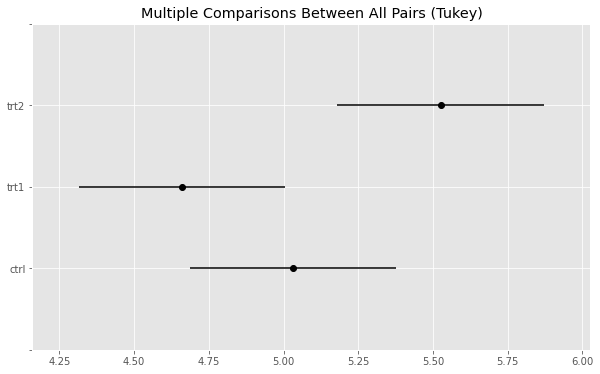

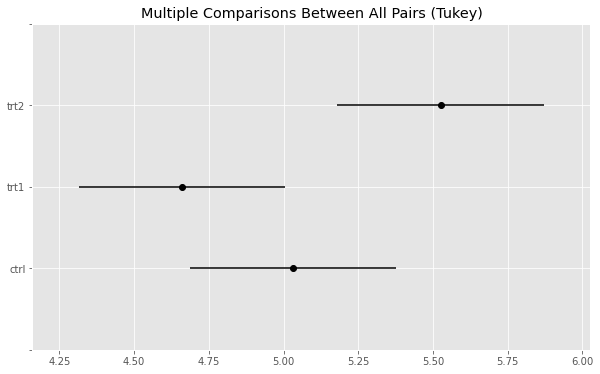

In [30]:
# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(df['weight'], df['group'], alpha=0.05)

# Print results
print("\nTukey's HSD Results:")
print(tukey)

# Plot results
tukey.plot_simultaneous()

## ANOVA Assumptions

In [31]:
# Python Code for Assumptions

import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene

# Simulate the PlantGrowth dataset
data = {
    "group": ["ctrl"] * 10 + ["trt1"] * 10 + ["trt2"] * 10,
    "weight": (
        [4.17, 4.81, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69] + # ctrl
        [4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69] + # trt1
        [6.11, 5.74, 5.80, 5.25, 5.89, 5.26, 5.71, 5.00, 5.27, 5.00] # trt2
    ),
}
df = pd.DataFrame(data)

# Group data
ctrl = df[df['group'] == 'ctrl']['weight']
trt1 = df[df['group'] == 'trt1']['weight']
trt2 = df[df['group'] == 'trt2']['weight']

# 1. Test for Normality (Shapiro-Wilk test)
print("Normality Tests:")
for group_name, group_data in {"ctrl": ctrl, "trt1": trt1, "trt2": trt2}.items():
    stat, p = shapiro(group_data)
    print(f"{group_name}: p-value = {p:.4f} ({'Normal' if p > 0.05 else 'Not Normal'})")

# 2. Test for Homogeneity of Variances (Levene’s test)
stat, p = levene(ctrl, trt1, trt2)
print(f"\nHomogeneity of Variances: p-value = {p:.4f} ({'Equal Variances' if p > 0.05 else 'Unequal Variances'})")



Normality Tests:
ctrl: p-value = 0.4519 (Normal)
trt1: p-value = 0.4519 (Normal)
trt2: p-value = 0.2797 (Normal)

Homogeneity of Variances: p-value = 0.3134 (Equal Variances)


## Explanation why it's appropriate to apply ANOVA when analyzing two groups rather than conduncting multiple t-tests

When analyzing data from more than two groups, ANOVA (Analysis of Variance) is more appropriate than conducting multiple t-tests for the following reasons:

1. Control of Type I Error Rate

Each t-test carries a risk of Type I error (false positive). Conducting multiple t-tests increases the cumulative probability of making a Type I error.

ANOVA tests for differences across all groups simultaneously while maintaining the overall Type I error rate at the specified significance level.


2. Efficiency

ANOVA is a single test that evaluates whether there are any significant differences between group means. Conducting multiple t-tests is less efficient as it requires more tests and pairwise comparisons.


3. Interpretation

ANOVA provides a unified framework to test for differences between multiple groups. 

### ANOVA preference over several t-Tests show case in Python

In [35]:
# Step 1: Simulate PlantGrowth Dataset.

import pandas as pd
import numpy as np

# Simulated PlantGrowth dataset
data = {
    "group": ["ctrl"] * 10 + ["trt1"] * 10 + ["trt2"] * 10,
    "weight": (
        np.random.normal(5.0, 0.5, 10).tolist() +  # ctrl group
        np.random.normal(5.2, 0.5, 10).tolist() +  # trt1 group
        np.random.normal(5.4, 0.5, 10).tolist()    # trt2 group
    ),
}
df = pd.DataFrame(data)

#Step 2: Perform ANOVA

from scipy.stats import f_oneway

# Separate groups
ctrl = df[df["group"] == "ctrl"]["weight"]
trt1 = df[df["group"] == "trt1"]["weight"]
trt2 = df[df["group"] == "trt2"]["weight"]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(ctrl, trt1, trt2)

print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("At least one group mean is significantly different.")
else:
    print("No significant difference between group means.")


# Step 3: Perform Multiple t-tests.

from scipy.stats import ttest_ind

# Pairwise t-tests
pairs = [
    ("ctrl vs trt1", ttest_ind(ctrl, trt1)),
    ("ctrl vs trt2", ttest_ind(ctrl, trt2)),
    ("trt1 vs trt2", ttest_ind(trt1, trt2)),
]

# Display results
for pair, (stat, p) in pairs:
    print(f"{pair} - t-statistic: {stat:.2f}, p-value: {p:.4f}")

#Step 4: (Optional) Post-hoc Test.
#If the ANOVA test is significant, a post-hoc test like Tukey's HSD can identify which specific groups differ.

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD
tukey = pairwise_tukeyhsd(df["weight"], df["group"], alpha=0.05)
print(tukey)



ANOVA F-statistic: 1.54, p-value: 0.2336
No significant difference between group means.
ctrl vs trt1 - t-statistic: -0.55, p-value: 0.5920
ctrl vs trt2 - t-statistic: -2.07, p-value: 0.0533
trt1 vs trt2 - t-statistic: -1.01, p-value: 0.3281
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   0.1148 0.8503 -0.4268 0.6564  False
  ctrl   trt2   0.3737 0.2199 -0.1679 0.9153  False
  trt1   trt2   0.2589 0.4736 -0.2827 0.8005  False
---------------------------------------------------


# End